# Palmer Penguins Data Analysis






---

### Palmer Penguins Dataset Background

The 'Palmer Penguins' dataset, collected between 2007 and 2009, was made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) from the [Palmer Station](https://www.nsf.gov/geo/opp/support/palmerst.jsp) in Antarctica, part of the [US Long Term Ecological Research Network](https://lternet.edu/). It contains data on 344 penguins of three different species, gathered from three islands in the Palmer Archipelago.

The purpose of collecting this data was to study the foraging behavior of Antarctic penguins and its correlation with environmental variables. Originally, the findings were presented as three separate datasets, one for each species of penguin. These datasets were later combined into a single dataset, which will be explored and analysed in this Jupyter notebook.

**Sources:**

- [Kaggle.com- About the Palmer Penguins dataset](https://www.kaggle.com/code/florianspire/palmer-penguins-data-preprocessing-and-analysis)
- [Allison Host-About the Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html)
- [UC Irvine Machine Learning Repository- About the Palmer Penguins dataset](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3)





---

### Import Libraries



In [24]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


___

### Load and view summary of the dataset 

In [25]:
# Load the Palmer Penguins dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [27]:
# Give summary of the dataset
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


The dataset is made up of several variables:<br/>
- Island 
- Species 
- Bill length
- Bill depth
- Flipper length
- Body mass
- Sex.

---

### Overview of the Palmer Penguin dataset 
<br/>
In the dataset summary each variable is accompanied by a several descriptions. <br/>


- **count:** This indicates the number of non-empty values for each column.<br />
The columns `species` and `island` have a count of 344, indicating that there are no missing values.<br />
The columns `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` each have a count of 342, indicating two missing values per column. <br />
The column `sex` has a count of 333, implying one missing value<br /><br />

- **unique:** Only applies to non numeric fields and indicates the number of unique values in each column. <br />
`species` and `island` both contain three unique values while `sex` has two unique values.
<br /><br />

- **top:** Only applies to non numeric fields and indicates the most frequent value in each column.<br />
In this dataset, `Adelie` is the most common species, `Biscoe` is the most common island, and `MALE` is the most common sex.
<br /><br />

- **freq:** This indicates the frequency of the 'top' value.<br/>
 In this dataset, there were 152 observations of the `Adelie` species, 168 observations on the island of `Biscoe`, and 168 penguins were identified as `MALE` out of a total of 344
<br /><br />

- **mean:** Only applies to numeric columns and gives the average value for each. <br /><br />

- **std** Only applies to numeric columns and gives the standard deviation for each.<br />
It measures the variation from the mean for each column. <br/><br />

- **min** Only applies to numeric columns and gives the minimum value for each <br/><br />

- **25%** Only applies to numeric columns, representing the first quartile or 25th percentile of each column's values. <br />
For example: <br/>
in `bill_length_mm`, 25% of the values are below 39.225000 mm <br /><br />

- **50%** Only applies to numeric columns , representing the median or 50% percentile of each colum's values. <br />
For example: <br/>
17.300000 mm is the median value for `bill_depth_mm`, indicating that 50% of the values are less than 17.300000 mm..<br /><br />

- **75%** Only applies to numeric colums, representing the third quartile or 75% percentile of each colum's values. <br />
For example: <br/>
in `flipper_length_mm`, 75% of the values are below 213.000000 mm.<br /><br />

- **max** Only applies to numeric columns and gives the maximum values for each <br/><br/>


**Sources:**

([w3schools - Statistics Percentiles](https://www.w3schools.com/datascience/ds_stat_percentiles.asp))<br />
([w3resource - Pandas DataFrame: describe() function](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php))<br />
([w3schools - Pandas DataFrame describe() Method](https://www.w3schools.com/python/pandas/ref_df_describe.asp))<br />
([wikipedia - Quartiles](https://en.wikipedia.org/wiki/Quartile))<br />
([wikipedia - Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation))<br />





---

### Variable types in the Palmer Penguins Dataset

In [28]:
# Get python variable types
variable_types = df.dtypes
# Print variable types
print(variable_types)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


**Sources:** <br/>
([stackoverflow- How to detect subtypes in Pandas object column](https://stackoverflow.com/questions/51817742/how-could-i-detect-subtypes-in-pandas-object-columns))<br />

In [29]:
# Get Variable types of column 'species'

object_column = df['species']
#Get the variable type of each element in the column
variable_types = object_column.apply(type)
#Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'>]


In [30]:
# Get Variable types of column 'island'


object_column = df['island']
#Get the variable type of each element in the column
variable_types = object_column.apply(type)
#Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'>]


In [31]:
# Get Variable types of column 'sex'


object_column = df['sex']
#Get the variable type of each element in the column
variable_types = object_column.apply(type)
#Get the unique variable types
unique_variable_types = variable_types.unique()

print(unique_variable_types)

[<class 'str'> <class 'float'>]


**Sources**: <br/>
Note: The code to get the variable types of each object column was written with the assistance of chat GPT

In [32]:
# Check unique values in the 'sex' column to understand why float is a variable type
unique_sex_values = df['sex'].unique()
# Print unique values
print(unique_sex_values)


['MALE' 'FEMALE' nan]


The value 'nan' has been used to represent missing data. This is why 'float' is returning as a variable type.

**Source:**<br/>
([geeksforgeeks.org - Get unique values from a column in a pandas df](https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/))<br />

---

### Variables types in the Palmer Penguins data set - Python Perspective
In my exploration of the variable types in Python, I found:. <br /><br />

**Float Variables**<br />
Variables comprised of floating point numbers.<br />
- `bill_length_mm`
- `bill_depth_mm `
- `flipper_length_mm`
- `body_mass_g `<br /><br />


**String Variables**<br />
Variables comprised of a 'string' of characters.<br />
- `species`
- `island`
<br /><br />

**Mixed Variables**

- `sex`<br /><br />

I will treat the `sex` variable as a string for modeling, as the 'float' categorization arises from a singular missing value, which will be removed during data cleaning.<br /><br />

**Sources**<br/>
([w3schools- Floats in python](https://www.w3schools.com/go/go_float_data_type.php#:~:text=The%20float%20data%20types%20are,%2C%20%2D2.34%2C%20or%203597.34987.))<br />
 ([programiz.com- Strings in python](https://www.programiz.com/python-programming/string#google_vignette))<br />


***

### Variables types in the Palmer Penguins data set - Data Analytics Perspective

From a data analysis perspective, the variables in the Palmer Penguins data set fall into two main types: Numerical (also known as Quantitative) and Categorical (also known as Qualitative).<br /><br />

**Numerical Variables:**
Represent amounts and can be Continuous or Discrete. In this dataset, all quantitative variables are Continuous, as they can assume a range of real values within a specified interval.These variables are:<br/>
- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

**Categorical Variables**
Represent groupings or categories and cannot be quantified. These variables are:<br/>
- `Island`
- `Species`
- `Sex`<br/>

Categorical variables can be further categorized into Ordinal, Nominal, or Binary types. `Island` and `Species` fall under Nominal variables, as they lack inherent ordering among their categories.`Sex `could be classified as either Binary or Nominal. While it has the criteria of a nominal variable, it also exhibits binary characteristics, with only two possible outcomes based on the dataset's infromation.


**Sources**<br/>
([codecademy- Variable types for data science](https://www.codecademy.com/learn/dsf-exploratory-data-analysis-python/modules/dsf-variable-types-for-data-science/cheatsheet))<br />
([statcan- Types of variables ](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm))<br />
([outlier- discrete vs continuous variables](https://articles.outlier.org/discrete-vs-continuous-variables#section-what-is-a-discrete-variable))<br />
([PennState Eberly College of Science - binary caregorical variables](https://online.stat.psu.edu/stat500/lesson/3/3.2/3.2.2#:~:text=A%20binary%20variable%20is%20a,of%20a%20binary%20categorical%20variable.))<br />


---

### Variable Types in Summary <br />
Based on the analysis this table summarizes the variabe types found in the dataset <br />



| Variable | Python Variable type| Data Analytics Variable type |
|:-------------|:--------------:|--------------:|
| Species    |    String  |       Categorical ,Nominal|
| Island     |    String   |       Categorical ,Nominal    |
| bill_length_mm    |    Float  |       Numerical ,Continuous   |
| bill_depth_mm      |     Float  |       Numerical ,Continuous   |
| flipper_length_mm      |    Float  |       Numerical ,Continuous   |
| body_mass_g     |       Float  |       Numerical ,Continuous  |
| sex     |    String  |       Categorical,Binary  ,Nominal|

***

### 'Island' Variable visualised as a bar chart

In [33]:
#Get the value counts for 'Island'
island_count=df['island'].value_counts()

Text(0, 0.5, 'Count of Penguins')

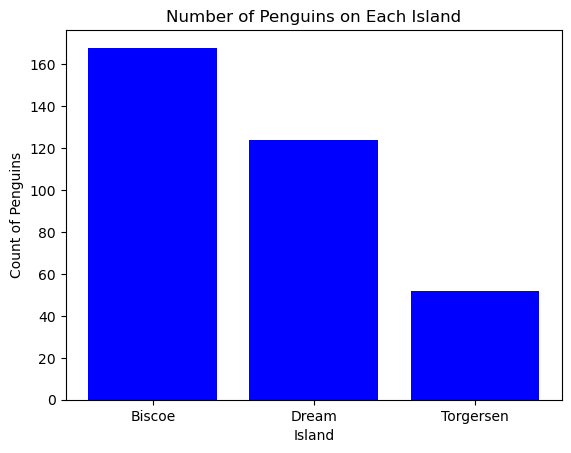

In [34]:
#Plotting the bar chart for the amount of penguins on each island.
plt.bar(island_count.index, island_count.values, color='blue')
plt.title('Number of Penguins on Each Island')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')


The bar chart displays penguin counts per island. The majority were observed on Biscoe, with fewer than 60 on Torgersen.

---

### 'Flipper' variable visualised as a histogram

In [35]:
#Get the value counts for 'Flipper Length (mm)'
island_count=df['flipper_length_mm'].value_counts()

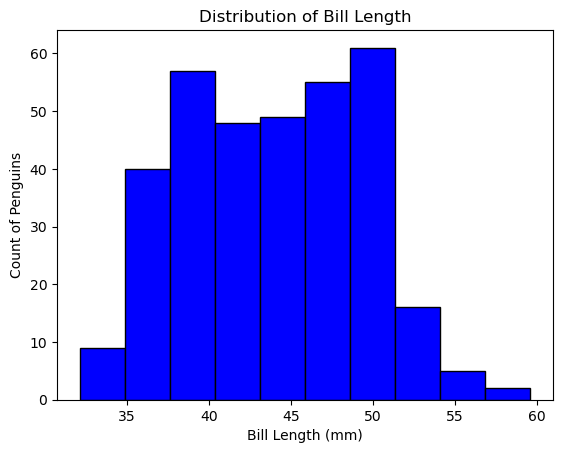

In [36]:
# Plot a histogram for the distribution of Bill length.
plt.hist(df['bill_length_mm'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Count of Penguins')
plt.show()


The histogram illustrates penguin bill length distribution. Most penguins fall within the 35mm to slightly over 50mm range, with a few outliers on both ends.

***

### Correlation between two variables.

To begin the analysis of two variables in the Palmer Penguins dataset, I'll first explore the correlation between all numeric variables. Before calculating the correlation, I'll assess the data quality and identify any missing values.<br/>

Let's start by identifying columns with missing data. This step is crucial as missing values can interfere with plotting linear regression lines, and it's best practice to thoroughly analyze the dataset for any missing values:

In [37]:
# Check for missing values in the data frame
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


**Source**: <br/>([cmdlinetips.com - Get number of missing values in each column](https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/))

As we can see, 5 of the columns are missing values. I will focus on the numeric fields for the purpose of correlation. `bill_length`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` each have two missing values.<br/>

There are three options here:

- I could replace the two missing values of each column by using mean or median imputation.
- I could drop the missing values.
- I could leave the null values in the dataset.
<br/>
Since the missing values represent less than 2% of all observations in each column, they will likely have little impact on the correlations using these variables.<br/>

Below, the correlation matrix of the cleaned data frame compared to the original data frame shows this.<br/>

**Source**<br/>
([Eugenio "Jay" Zuccarelli- Imputation and dealing with missing data](https://towardsdatascience.com/the-dos-and-donts-of-imputation-d89d72a26a58))

In [38]:
#Remove 'NaN' values from the data set 

df_cleaned = df.dropna()

**Source**<br/>
([ w3schools - dropna function](https://www.w3schools.com/python/pandas/ref_df_dropna.asp))

### Cleaned data frame correlation matrix:

In [39]:
#Create a data frame from the cleaned data set of just the numeric columns.
numeric_df_cleaned = df_cleaned.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix_cleaned = numeric_df_cleaned.corr()

#Show the correlation matrix
(correlation_matrix_cleaned)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


###  Original data frame correlation matrix:

In [40]:

#Create a data frame from the cleaned data set of just the numeric columns.
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

#Show the correlation matrix
(correlation_matrix)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000



Removing the NaN values has not significantly affected the correlation calculations.

**Sources**<br/>
([statology.org- Correlation in python](https://www.statology.org/correlation-in-python/))<br/>
([geeksforgeeks- Correlation matrix in python](https://www.geeksforgeeks.org/how-to-create-a-correlation-matrix-using-pandas/))<br/>


The matrix above reveals that `flipper_length_mm` and `body_mass_g` exhibit the highest correlation among variables. While `bill _depth_mm` and `flipper_length_mm` show the lowest correlation.<br/>

Given the strong correlation between `flipper_length_mm` and `body_mass_g`, I will delve deeper into these variables. I'll visualize their correlation using a scatter plot.

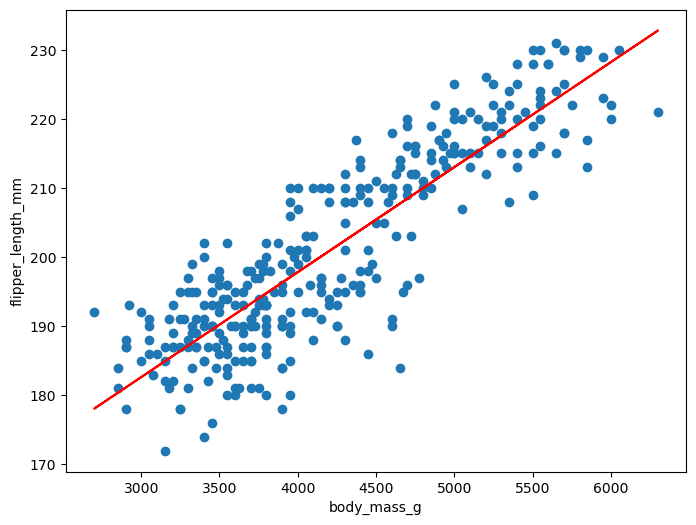

In [42]:
#Set the variables for the scatter plot
x_variable = 'body_mass_g'
y_variable = 'flipper_length_mm'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_variable], df_cleaned[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)

#Get m (slope) and b(intercept) of the linear regression line
m, b = np.polyfit(df_cleaned[x_variable], df_cleaned[y_variable], 1)

#Add the linear regression line to the scatter plot
plt.plot(df_cleaned[x_variable], m*df_cleaned[x_variable]+b,color='red')

#Show graph
plt.show()

**Sources**<br/>
([machinelearningplus- Python scatter plots ](https://www.machinelearningplus.com/plots/python--plot/))<br/>
([statology.org- How to create a scatter plot with a regression line ](https://www.statology.org/scatterplot-with-regression-line-python/))<br/>

With a correlation coefficient of 0.871202 between `flipper_length_mm`  and `body_mass_g`, indicating a strong positive relationship, we can observe a clear upward linear trend in the scatter plot. This trend suggests that as body mass increases, so does flipper length. This conclusion aligns with findings from other studies, such as those by [Alison Hill, Allison Horst, Kristen Gorman](https://allisonhorst.github.io/palmerpenguins/articles/examples.html), who used 'R' in their analysis.


See others studies:<br/>
([Jingyi Fang](https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda))<br/>
([Taylor via RPubs using R ](https://rpubs.com/TEHoule/PalmerPenguinPlayground))<br/>
([Shah Nawaz via RPubs using R ](https://rpubs.com/shahworld/scatter))<br/>

**Source**<br/>
([Statistics By Jim- Correlations](https://statisticsbyjim.com/basics/correlations/#:~:text=Correlation%20Coefficient%20%3D%200.8%3A%20A%20fairly,change%20in%20a%20specific%20direction.))<br/><br/><br/>


For a deeper investigation, I'll examine how the correlation between `flipper_length_mm` and `body_mass_g` varies across the three species of penguins.

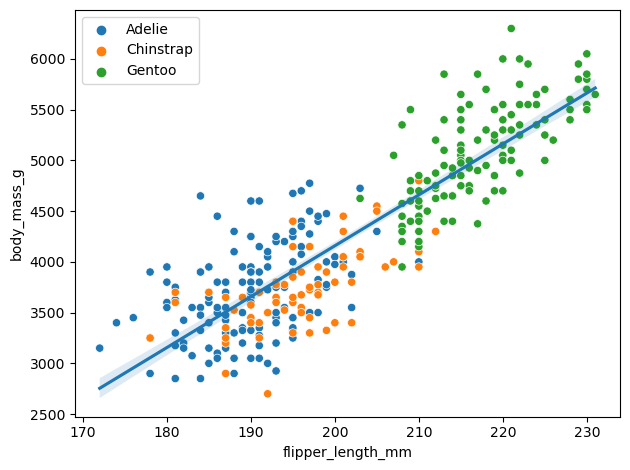

In [ ]:

# Create the scatter plot and set variables
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df_cleaned)

#Add a regression line to the scatter plot
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=df_cleaned, scatter=False)

# Format the legend
plt.legend(loc='upper left')

# Manually adjust the layout
plt.tight_layout()

plt.show()


**Sources**<br/>
([ALEX LABUDA/Kaggle - Scatter plot by category ](https://www.kaggle.com/code/alabuda/classification-and-eda-palmer-penguins))<br/>
([stackoverflow - regression lines in seabourn](https://stackoverflow.com/questions/66084983/how-to-plot-one-linear-regression-scatterplot-for-multiple-columns-in-a-datafram))




From the scatter plot above, we observe:

- Gentoo penguins are the largest in both `body_mass_g` and `flipper_length_mm`.
- Adelie penguins have the shortest `flipper_length_mm` among the observed species.
- Chinstrap penguins have the lowest `body_weight_g` among individuals, but overall, Adelie penguins appear to have the lowest `body_weight_g` among the observed species.




# Conclusion:

- A positive correlation exists between `flipper_length_mm` and `body_mass_g` in this dataset.
- While positive correlation doesn't imply causation, it's logical that penguins with longer flippers tend to have heavier body masses, and vice versa.
- Some outliers in the scatter plots deviate from the trend line. Possible explanations include:
  - Fluctuations in weight due to factors like molting, mating, seasonality, and food availability, as observed in Chinstrap and Gentoo penguins ([Wikipedia](https://en.wikipedia.org/wiki/Chinstrap_penguin), [Wikipedia](https://en.wikipedia.org/wiki/Gentoo_penguin)).
  - The age of the penguins is unknown; inclusion of juvenile penguins could lead to outliers in the flipper length to body mass ratio.


